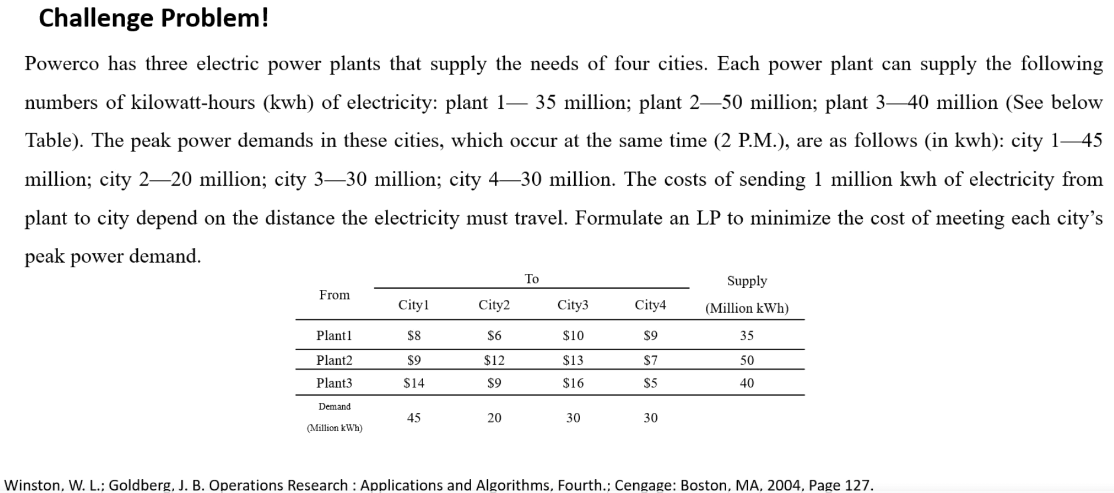

In [19]:
import pyomo.environ as pyo
from pyomo.opt import SolverFactory

Define the model

In [12]:
model=pyo.ConcreteModel()

In [13]:
#define the sets
model.i=pyo.RangeSet(1,3)
model.j=pyo.RangeSet(1,4)

"""
model.i=pyo.Set('Plant1', 'Plant2', 'Plant3')
model.j=pyo.Set('City1', 'City2', 'City3')
"""

"\nmodel.i=pyo.Set('Plant1', 'Plant2', 'Plant3')\nmodel.j=pyo.Set('City1', 'City2', 'City3')\n"

In [14]:
#define the parameters
#supply parameters
model.S=pyo.Param(model.i, initialize={1:35, 2:50, 3:40})
S=model.S

#demand parameters
model.D=pyo.Param(model.j, initialize={1:45, 2:20, 3:30, 4:30})
D=model.D

#cost/kwh parameters: 
model.P=pyo.Param(model.i, model.j, initialize={(1,1):8, (1,2):6, (1,3):10, (1,4):9, 
                                                (2,1):9, (2,2):12, (2,3): 13, (2,4):7,
                                                (3,1):14, (3,2):9, (3,3): 16, (3,4):5,
                                                })

P=model.P

In [15]:
#Define the decision variables
model.x=pyo.Var(model.i, model.j, within=pyo.NonNegativeReals)
x=model.x
#define the objective function

def Objective_rule(model):
    return sum(sum(P[i,j]*x[i,j] for i in model.i) for j in model.j)

model.Obj=pyo.Objective(rule= Objective_rule, sense=pyo.minimize)

In [17]:
def constraint1(model, i):
    return sum(x[1,j] for j in model.j)<=S[1]
model.const1=pyo.Constraint(model.j, rule=constraint1)

def constraint2(model, i):
    return sum(x[2,j] for j in model.j)<=S[2]
model.const2=pyo.Constraint(model.j, rule=constraint2)

def constraint3(model, i):
    return sum(x[3,j] for j in model.j)<=S[3]
model.const3=pyo.Constraint(model.j, rule=constraint3)

def constraint4(model, j):
    return sum(x[i,1] for i in model.i)>=D[1]
model.const4=pyo.Constraint(model.i, rule=constraint4)

def constraint5(model, j):
    return sum(x[i,2] for i in model.i)>=D[2]
model.const5=pyo.Constraint(model.i, rule=constraint5)

def constraint6(model, j):
    return sum(x[i,3] for i in model.i)>=D[3]
model.const6=pyo.Constraint(model.i, rule=constraint6)

def constraint7(model, j):
    return sum(x[i,4] for i in model.i)>=D[4]
model.const7=pyo.Constraint(model.i, rule=constraint7)

    'pyomo.core.base.constraint.IndexedConstraint'>) on block unknown with a
    new Component (type=<class
    'pyomo.core.base.constraint.IndexedConstraint'>). This is usually
    indicative of a modelling error. To avoid this warning, use
    block.del_component() and block.add_component().


In [20]:
#solve the proble,
Solver=SolverFactory("glpk")
results=Solver.solve(model)

In [23]:
print(results)
print('objective function = ', model.Obj())
print('objective function = ', model.Obj())
for i in model.i:
    for j in model.j:
        print(f'Electricity sent from Plant {i} to City {j}: ', x[i,j]())



Problem: 
- Name: unknown
  Lower bound: 1020.0
  Upper bound: 1020.0
  Number of objectives: 1
  Number of constraints: 25
  Number of variables: 13
  Number of nonzeros: 85
  Sense: minimize
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 0.05612444877624512
Solution: 
- number of solutions: 0
  number of solutions displayed: 0

objective function =  1020.0
objective function =  1020.0
Electricity sent from Plant 1 to City 1:  0.0
Electricity sent from Plant 1 to City 2:  10.0
Electricity sent from Plant 1 to City 3:  25.0
Electricity sent from Plant 1 to City 4:  0.0
Electricity sent from Plant 2 to City 1:  45.0
Electricity sent from Plant 2 to City 2:  0.0
Electricity sent from Plant 2 to City 3:  5.0
Electricity sent from Plant 2 to City 4:  0.0
Electricity sent from Plant 3 to City 1:  0.0
Electricity sent from Plant 3 to City 2:  10.0